# Project: Yelp Rating Regression Predictor

`PURPOSE: Since a restaurant's success is highly correlated with its reputation, I wanted to dive into ratings data to see if there are certain criteria that are more helpful in gaining a higher Yelp rating than another.` 

`GOAL: Here, I use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and use the model to predict a hypothetical new restaurant's the Yelp rating for a restaurant.`


# Dataset Description

* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

# Feature Descriptions:

`yelp_business.json: contains establishment data regarding location and attributes`
* address: string, the full address of the business
* alcohol?: integer, 0 or 1 for does not serve alcohol or serves alcohol in some capacity, respectively
* attributes: object, business attributes to values. note: some attribute values might be objects
* business_id: string, 22 character unique string business id
* categories: an array of strings of business categories
* city: string, the city
* good_for_kids: integer, 0 or 1 for not child friendly establishment or child friendly establishment, respectively
* has_bike_parking: integer, 0 or 1 for does not have bike parking or does have bike parking, respectively
* has_wifi: integer, 0 or 1 for does not have wifi or does have wifi, respectively
* hours: an object of key day to value hours, hours are using a 24hr clock
* is_open: integer, 0 or 1 for closed or open, respectively
* latitude: float, latitude
* longitude: float, longitude
* name: string, the business's name
* neighborhood: string, the neighborhood's name
* postal_code: string, the postal code
* price_range: integer, 0, 1, 2, 3, or 4 for price of meal/service with 0 being least expensive and 4 being most expensive
* review_count: integer, number of reviews
* stars: float, star rating, rounded to half-stars
* state: string, 2 character state code, if applicable
* take_reservations: integer, 0 or 1 for does not take reservations or takes reservations, respectively
* takes_credit_cards: integer, 0 or 1 for does not take credit cards or does take credit cards, respectively

`yelp_review.json: contains Yelp review metadata by business`
* average_review_age: float, average age of reviews, in days, on business' Yelp page
* average_review_length: float, average length of review, in characters, on business' Yelp page
* average_review_sentiment: float, from -1 to 1, representing the average sentiment of reviews on business' Yelp page, with -1 being most negative, 0 being neutral, and 1 being positive
* business_id: string, 22 character unique string business id
* number_cool_votes: integer, total number of cool votes given to reviews on business' Yelp page
* number_funny_votes: integer, total number of funny votes given to reviews on business' Yelp page
* number_useful_votes: integer, total number of useful votes given to reviews on business' Yelp page

`yelp_user.json: contains user profile metadata by business`
* average_days_on_yelp: float, average days on Yelp for all businesses' reviewers
* average_number_fans: float, average number of fans for all businesses' reviewers
* average_number_friends: float, average number of friends for all businesses' reviewers
* average_number_years_elite: float, average number of years with elite status for all businesses' reviewers
* average_review_count: float, average number of total reviews for all businesses' reviewers
* business_id: string, 22 character unique string business id

`yelp_checkin.json: contains online checkin metadata by business`
* business_id: string, 22 character unique string business id
* time: nested object of the day of the week with key of the hour (using a 24hr clock) with the count of checkins for that hour (e.g. 14:00 - 14:59)
* weekday_checkins: integer, total number of checkins at business during Mondays, Tuesdays, Wednesdays and Thursdays
* weekend_checkins: integer, total number of checkins at business during Fridays, Saturdays and Sundays

`yelp_tip.json: contains tip metadata by business`
* average_tip_length: float, average length of tip, in characters, on business' Yelp page
* business_id: string, 22 character unique string business id
* number_tips: integer, total number of tips left on business' Yelp page

`yelp_photo.json: contains photo metadata by business`
* average_caption_length: float, average length of photo caption, in characters, for photos on business' Yelp page
* business_id: string, 22 character unique string business id
* number_pics: integer, total number of pictures posted on business' Yelp page

# 1 - Load the Data:

In [1]:
# import pandas library
import pandas as pd

In [3]:
#load yelp_business.json into dataframe
businesses = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_business.json',
                          lines = True)

#load yelp_review.json into dataframe
reviews = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_review.json', lines=True)

#load yelp_user.json into dataframe
users = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_user.json', lines=True)

#load yelp_checkin.json into dataframe
checkins = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_checkin.json', lines=True)

#load yelp_tip.json into dataframe
tips = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_tip.json', lines=True)

#load yelp_photo.json into dataframe
photos = pd.read_json('/Users/jonathanmatsen/Documents/3_projects/1_showcase_projects/predictor_model/yelp_regression/yelp_photo.json', lines=True)

# 2 - Explore the data:

## _Set dataframe parameters_

In [4]:
# adjust max columns to display as 60 
pd.options.display.max_columns = 60

# adjust max column width to 500 characters 
pd.options.display.max_colwidth = 500

##  _Get familiar with the data_

In [5]:
# overview of businesses dataframe 
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [6]:
# overview of reviews dataframe 
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [7]:
# overview of users dataframe 
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [8]:
# overview of checkins dataframe 
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [9]:
# overview of tips dataframe 
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [10]:
# overview of photos dataframe 
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


## _Diving Deeper_

### _Properties of the dataframes_

In [11]:
# summarize businesses df structure
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

### _Summary Statistics of Dataframes_

In [12]:
# review summary statistics of users  

users.describe(include='all')

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
unique,188593,NaN,NaN,NaN,NaN,NaN
top,5RTL-ZQ8LS6gN3TLpJmDkg,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,105.132000,2005.367009,11.590148,122.110660,0.923313
std,NaN,162.653680,554.174540,25.901801,208.814471,1.109289
min,NaN,1.000000,76.000000,0.000000,0.666667,0.000000
25%,NaN,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,NaN,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,NaN,117.666667,2312.238095,11.555556,143.454545,1.400000


# 3 - Merge Into An Aggregate DataFrame 

In [13]:
# merge businesses with reviews on business if into new dataframe 'df'
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [14]:
# merge users with df and print length of df to ensure accurate number of records during merge
df = pd.merge(df, users, how='left', on='business_id')
print(len(df))

188593


In [15]:
# merge checkins with df and print length of df to ensure accurate number of records during merge
df = pd.merge(df, checkins, how='left', on='business_id')
print(len(df))

188593


In [16]:
# merge tips with df and print length of df to ensure accurate number of records during merge 
df = pd.merge(df, tips, how='left', on='business_id')
print(len(df))

188593


In [17]:
# merge photos with df and print length of df to ensure accurate number of records during merge
df = pd.merge(df, photos, how='left', on='business_id')
print(len(df))

188593


## _Quality Check_

In [18]:
# verify number of columns in df = 40 
len(df.columns)

40

In [19]:
# verify all expected column names present in final merged df 
df.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

### _Explore merged df_

In [20]:
# overview of df 
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,38.0,6.0,NaN,NaN
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,{'Sun-1': 1},0.0,1.0,66.0,1.0,29.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': 1, 'Sat-17': 1, 'Wed-20': 1, 'Sat-23': 1}",2.0,5.0,32.0,1.0,NaN,NaN
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.3

# 4 - Clean the Data:

In [21]:
# create list of non-continuous and non-binary features to remove
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time'] 

# remove unwanted attributes 
df.drop(features_to_remove, axis=1, inplace=True)

In [22]:
#check for missing values
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [23]:
# replace missing values by replacing NaNs w/ 0s 
df.fillna({'weekday_checkins': 0, 
           'weekend_checkins': 0, 
           'average_tip_length': 0, 
           'number_tips': 0, 
           'average_caption_length': 0,
           'number_pics': 0},
          inplace=True)

In [24]:
# double check for any remaining missing values 
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

# 5 - Understand the data:

## _> Correlation Analysis_

In [25]:
# Compute pairwise correlation of columns in df
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


In [27]:
style = df.style.bar(align='mid', color=['red', 'lightgreen'])
style

KeyboardInterrupt: 

------
### _*Observation: Features with highest correlation with 'stars'*:_

* alcohol: -0.043332
* good_for_kids: -0.030382
* has_bike_parking: 0.068084
* has_wifi: -0.039857
* price_range: -0.052565
* review_count: 0.032413
* **average_review_age: -0.125645**
* **average_review_length: -0.277081**
* **average_review_sentiment: 0.782187**
* average_days_on_yelp: -0.038061
* average_number_fans: -0.031141
* average_review_count: -0.066572
* average_years_elite: -0.064419
* average_tip_length: -0.052899

-------

`To further visualize these relationships, I wanted to plot certain features against the dependent variable, the Yelp rating. I use Matplotlib's .scatter() method to plot what these correlations look like.`

`To begin, I'll plot the three features that correlate most with Yelp rating (average_review_sentiment, average_review_length, average_review_age) against stars, the Yelp rating.`


-------

## _> Plot the data_

In [29]:
#import pyplot from matplotlib to create scatter plots
from matplotlib import pyplot as plt
import seaborn as sns

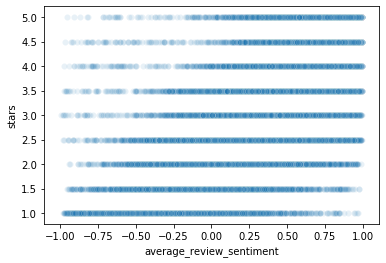

In [35]:
# plot average_review_sentiment against stars
sns.scatterplot(df.average_review_sentiment, df.stars, alpha=0.1)

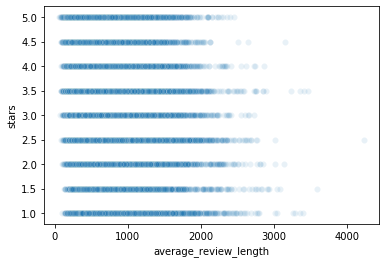

In [39]:
# plot average_review_length against stars 
sns.scatterplot(df.average_review_length, df.stars, alpha=0.1)


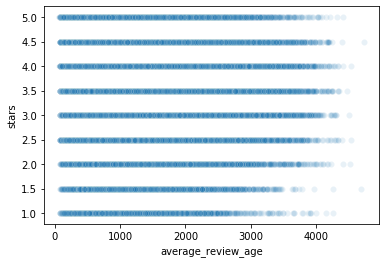

In [40]:
# plot average_review_age against stars 
sns.scatterplot(df.average_review_age, df.stars, alpha=0.1)

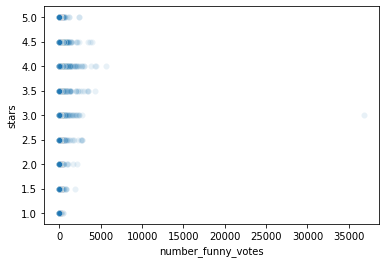

In [41]:
# plot number_funny_votes against stars 
sns.scatterplot(df.number_funny_votes, df.stars, alpha=0.1)

-----

###  _Takeaways_

`'average_review_sentiment' has highest correlation with stars. This may be because people are emotional beings and feed off of what other people previously felt. They trust their opinions.`

------

# 6 - Create Linear Regression Model

## _> Attribute Selection_

From correlation analysis, the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. 

Since `average_review_sentiment` has an understandably high correlation with Yelp rating, I wanted to dig a little deeper and first create the model with `average_review_length` and `average_review_age` as features.

In [42]:
# create new df 'features' containing columns to model on 
features = df[['average_review_length', 'average_review_age']]

# create new df to store the value to predict 'stars' (Yelp Rating)
ratings = df['stars']


## _> Split Data into Training and Testing Sets_


In [43]:
#import train_test_split from SciKit-Learn
from sklearn.model_selection import train_test_split

#split data
x_train, x_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)


## _> Model creation and training_


In [44]:
# import linear model from Sci-Kit Learn 
from sklearn.linear_model import LinearRegression

# create new LinearRegression object, 'model' 
model = LinearRegression()

# train model on training data 
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## _Model Evaluation_

Since the model can be evaluated in a variety of ways, I'll begin with using SKLearn's `.score()` method to derive the the R^2 (coefficient of determination) value for the model.

In [45]:
# calculate training coefficient of determination 
train_R2 = model.score(x_train, y_train)

# calculate test coefficient of determination 
test_R2 = model.score(x_test, y_test)

print(train_R2)
print(test_R2) 

0.08250309566544889
0.08083081210060561


`Now, I'll take a look at the coefficients on different features using the model's .coef_ attribute to take a look at an array of the feature coefficients determined by fitting the model the training data.`

`To make it easier to see which feature corresponds to which coefficient, displaying a list of features with the array of coefficients, sorted in descending order from most predictive to least predictive.`

------

In [46]:
# combine list of feature names with array of coefficients
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074524),
 ('average_review_age', -0.00011621626836366473)]

-----

`Now, I'll calculate the predicted Yelp ratings for the testing data and compare them to their actual Yelp ratings.`

----

In [47]:
# calc predicted star rating value based on feature coefficients test data 
y_predicted = model.predict(x_test)

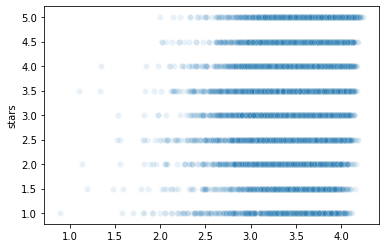

In [49]:
# plot y-test vs. y-predicted
sns.scatterplot(y_predicted, y_test, alpha=0.1)

# Defining Different Subsets of Data

`After evaluating the first model, it seems that average_review_length and average_review_age alone are not the best predictors for Yelp rating.` 

`I now want to try different subsets of features and see if a more accurate model can be achieved.` 


In [50]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [51]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [52]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [53]:
# all features
all_features = binary_features + numeric_features

In [54]:
# add your own feature subset here
feature_subset = ['alcohol?', 'has_bike_parking']

## _> Further Modeling_

`With a variety of different feature subsets, new models can now be created. In order to more easily compare the performance of these new models, I'll use a DIY function, model_these_features(), which replicates the model building process.` 

In [55]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # df.loc -- Access a group of rows and columns by label(s) or a boolean array
    # gathering ratings=x=dependent variable & features=y=independent variable
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    #splitting variable data into train/test for fitting then testing the model 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create model object and fit the model to relevant data 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # determine R2 values=coefficient of determination. Scale of 0 - 1 and tells us how well independent variables explain the dependent variable
    # 0.7 and up is generally considered good 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # see how well the model predicts the actual y_test variables 
    y_predicted = model.predict(X_test)
    
    # visualize the model's accuracy of predicted vs acutal 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749612)]


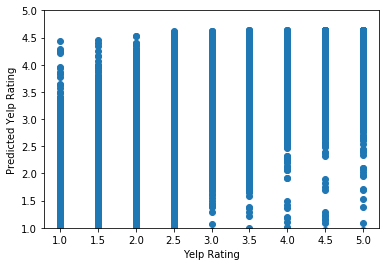

In [56]:
# create a model on sentiment here
sentiment_model = model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]


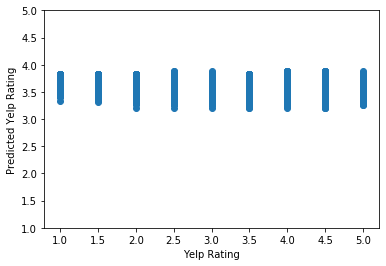

In [57]:
# create a model on all binary features here
binary_model = model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120151
[('average_review_sentiment', 2.2721076642095714), ('price_range', -0.08046080962701326), ('average_number_years_elite', -0.07190366288054215), ('average_caption_length', -0.00334706600778448), ('number_pics', -0.0029565028128954863), ('number_tips', -0.0015953050789045838), ('number_cool_votes', 0.0011468839227079775), ('average_number_fans', 0.0010510602097412254), ('average_review_length', -0.0005813655692093357), ('average_tip_length', -0.0005322032063459733), ('number_useful_votes', -0.0002320378475871201), ('average_review_count', -0.0002243170289501482), ('average_review_age', -0.00016930608165055923), ('average_days_on_yelp', 0.00012878025876674438), ('weekday_checkins', 5.91858075448613e-05), ('weekend_checkins', -5.518176206999151e-05), ('average_number_friends', 4.8269921116315975e-05), ('review_count', -3.483483763748981e-05), ('number_funny_votes', -7.884395673808679e-06)]


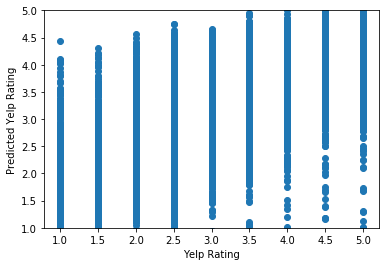

In [58]:
# create a model on all numeric features here
numeric_model = model_these_features(numeric_features)

Train Score: 0.6807828861895334
Test Score: 0.6782129045869247
[('average_review_sentiment', 2.2808456996623825), ('alcohol?', -0.14991498593470284), ('has_wifi', -0.12155382629261363), ('good_for_kids', -0.1180781442201382), ('price_range', -0.06486730150043177), ('average_number_years_elite', -0.06278939713895364), ('has_bike_parking', 0.027296969912292805), ('takes_credit_cards', 0.024451837853653652), ('take_reservations', 0.014134559172969846), ('number_pics', -0.0013133612300796843), ('average_number_fans', 0.0010267986822656814), ('number_cool_votes', 0.0009723722734409323), ('number_tips', -0.0008546563320873921), ('average_caption_length', -0.0006472749798195219), ('average_review_length', -0.0005896257920272453), ('average_tip_length', -0.00042052175034042557), ('number_useful_votes', -0.00027150641256153645), ('average_review_count', -0.000233983569025111), ('average_review_age', -0.00015776544111324774), ('average_days_on_yelp', 0.0001232614766288456), ('review_count', 0.00

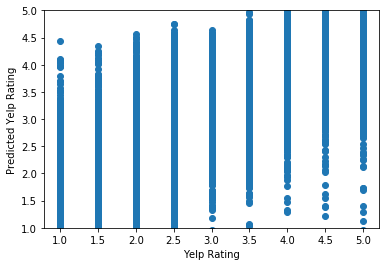

In [59]:
# create a model on all features here
all_model = model_these_features(all_features)

Train Score: 0.008314040541112733
Test Score: 0.007233125346231772
[('alcohol?', -0.17754683672071367), ('has_bike_parking', 0.17518128833909435)]


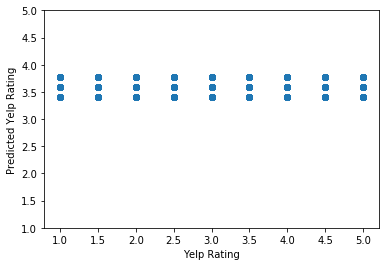

In [60]:
# create a model on your feature subset here
subset_model = model_these_features(feature_subset)

# The Model in Action 

`The best model was the model using all features, so I'll stick with that one.`

In [61]:
# review all features in dataframe
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


In [62]:
# grab features and retrain model on them
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

------

`To give some perspective on the restaurants already out there, the mean, minimum, and maximum values are displayed for each feature below.`

------

In [63]:
# display mean, min, max of all columns (features)
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [64]:
# fill out model with hypothetical values for a new restaurant to see what Yelp rating it will be given
danielles_delicious_delicacies = np.array([1,1,1,0,0,1,2,2,5,10,10,596,0.554935,15.61,18.49,50,45,3,200,2,10,20,0,50,60]).reshape(1,-1)

In [65]:
# display model output based on the above inuputs 
model.predict(danielles_delicious_delicacies)

array([3.39410498])

## Ideas for Further Analysis

* Predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?